# Saad's analysis of the Orogenator reaction (simplified Belousov-Zhabotinskii reaction) in a stirred flow reactor

In [617]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import random

# ODE solutions (for analysis/justification)

### ODEs describing reactions

In [618]:
## Rate constants in molar units
kf1 = 1.34
kr1 = 1e+4
kf2 = 1.6e+9
kr2 = 5e-5
kf3 = 8e+3
kr3 = 4.8e+11   # careful: third order rate
kf4 = 4e+7
kr4 = 1.6e-10
kf5 = 90
kr5 = 1e-5
## Constant concentrations
A0 = 0.06       # Bromate ion
# P is constant in original model but not in stirred flow reactor

In [619]:
## Initial concentrations
A0 = 0.06       # Bromate ion
X0 = 0          # HBrO2
Y0 = 0          # Bromide ion
Z0 = 0.00083    # 2 * Cerium(IV)
P0 = 0          # HOBr
y0 = np.array([A0,X0,Y0,Z0,P0])

## Residence time of reactor
t_res = 50.0     # change this from 0.5 h to 4.0 h

In [620]:
## Rates (wi)

# w1 = (kf1 * A * Y) - (kr1 * X * P)  # A + Y = X + P
# w2 = (kf2 * X * Y) - (kr2 * P * P)  # X + Y = 2P
# w3 = (kf3 * A * X) - (kr3 * X*X*Z)  # A + X = 2X + Z
# w4 = (kf4 * X * X) - (kr4 * A * P)  # 2X = A + P
# w5 = (kf5 * Z)     - (kr5 * Y)      # Z = fY where f = 1

## Residence time of reactor

# t_res = 0.5     # change this from 0.5 h to 4.0 h

$$ A + Y \rightleftharpoons X + P $$
$$ X + Y \rightleftharpoons 2P $$
$$ A + X \rightleftharpoons 2X + Z $$
$$ 2X \rightleftharpoons A + P $$
$$ Z \rightleftharpoons fY\ \ \textrm{where}\ \ f = 1 $$

In [621]:
## ODEs

def odes(t,y):
    # y = np.array([A,X,Y,Z,P])
    ## Variables
    A = y[0]
    X = y[1]
    Y = y[2]
    Z = y[3]
    P = y[4]
    ## Rates (wi)
    w1 = (kf1 * A * Y) - (kr1 * X * P)  # A + Y = X + P
    w2 = (kf2 * X * Y) - (kr2 * P * P)  # X + Y = 2P
    w3 = (kf3 * A * X) - (kr3 * X*X*Z)  # A + X = 2X + Z
    w4 = (kf4 * X * X) - (kr4 * A * P)  # 2X = A + P
    w5 = (kf5 * Z)     - (kr5 * Y)      # Z = fY where f = 1
    ## ODEs
    dAdt = 0                            # constant
    dXdt = w1 - w2 + w3 - 2*w4 - X/t_res
    dYdt = -w1 - w2 + w5 - Y/t_res
    dZdt = w3 - w5 - Z/t_res
    dPdt = w1 + 2*w2 + w4 - w5 - P/t_res

    return np.array([dAdt,dXdt,dYdt,dZdt,dPdt])



### ODE solver

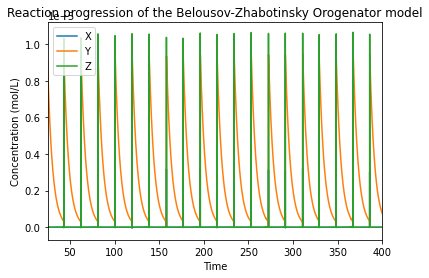

In [622]:
## Solver
t_span = np.linspace(25,500,num=100000)  # change if needed
sol_det = solve_ivp(odes, [0,500], y0, method='Radau', t_eval=t_span)

## Plots
#plt.plot(sol_det.t, sol_det.y[0,:], label='A')
plt.plot(sol_det.t, sol_det.y[1,:], label='X')
plt.plot(sol_det.t, sol_det.y[2,:], label='Y')
plt.plot(sol_det.t, sol_det.y[3,:], label='Z')
#plt.plot(sol_det.t, sol_det.y[4,:], label='P')


## Plot labels
plt.xlabel('Time')
plt.ylabel('Concentration (mol/L)')
plt.title('Reaction progression of the Belousov-Zhabotinsky Orogenator model')
plt.xlim(25,400)
plt.legend()
plt.show()

In [623]:
## Testing ODE solver
import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# y = np.array([r, u, phi, time])
def f(t, y):
    r = y[0] 
    f_r = y[1] # this is the dr / dT auxiliary equation
    f_u = - 7.5 / (r**2) + 2 / (r**3) - 15 / (r**4)
    f_phi = 1 / (r**2)
    f_time = k1 * r / (r - 5) # this is the equation of the time coordinate
    return np.array([f_r, f_u, f_phi, f_time])

# from the initial value for r = r0 and given energy k,  
# calculate the initial rate of change dr / dT = u0
def ivp(r0, k, sign):
    u0 = math.sqrt( k - ( 1 - 5 / (r0**2) ) * ( 3 + 2 / (r0**2) ) )
    return sign * u0

k = 3.0
k1 = 2.0
r0 = 20.0
sign = 1 # or -1

u0 = ivp(r0, k, sign)
# y = np.array([r, u, phi, time])
y0 = [r0, u0, math.pi/6, 0]
t_span = np.linspace(0, 10000, num=10000)   

sol = solve_ivp(f, [0, 10000], y0, method='RK45', t_eval=t_span)

#plt.plot(sol.t, sol.y[0,:],'-', label='r(t)') 
#plt.plot(sol.t, sol.y[2,:],'-', label='phi(t)')
#plt.legend(loc='best')
#plt.xlabel('T')

## Gillespie implementation

kf1 = 1.34

kr1 = 1e+4

kf2 = 1.6e+9

kr2 = 5e-5

kf3 = 8e+3

kr3 = 4.8e+11   # careful: third order rate

kf4 = 4e+7

kr4 = 1.6e-10

kf5 = 90

kr5 = 1e-5

$$ A + Y \rightleftharpoons X + P $$
$$ X + Y \rightleftharpoons 2P $$
$$ A + X \rightleftharpoons 2X + Z $$
$$ 2X \rightleftharpoons A + P $$
$$ Z \rightleftharpoons fY\ \ \textrm{where}\ \ f = 1 $$

In [624]:
## Volume
V = 100000000    # 1 liter times a fake 'Avogadro' number to cancel the mol unit

## Transition rates - get rid of stuff from k in such way that final unit is s-1
cf1 = kf1/V
cr1 = kr1/V
cf2 = kf2/V
cr2 = 2 * kr2/V
cf3 = kf3/V
cr3 = 2 * kr3/(V**2)    # 3rd order
cf4 = 2 * kf4/V
cr4 = kr4/V
cf5 = kf5
cr5 = kr5

## Pr

In [625]:
## Initializing copynumbers
A = [V * A0]
X = [V * X0]
Y = [V * Y0]
Z = [V * Z0]
P = [V * P0]

t = [0]
t_max = 500

### Iteration time!

In [626]:
while t[-1] < t_max:                    # looping until exceeds max t
    a = [cf1*A[-1]*Y[-1],               # propensities (a1)
         cr1*X[-1]*P[-1],               # a2
         cf2*X[-1]*Y[-1],               # a3
         cr2*P[-1]*(P[-1]-1)/2,         # a4
         cf3*A[-1]*X[-1],               # a5
         cr3*Z[-1]*X[-1]*(X[-1]-1)/2,   # a6
         cf4*X[-1]*(X[-1]-1)/2,         # a7
         cr4*A[-1]*P[-1],               # a8
         cf5*Z[-1],                     # a9
         cr5*Y[-1]                      # a10
         ]
    a0 = sum(a)                         # normalization

    if a0 == 0:
        break       # putting this early to avoid div by 0

    tau = np.random.exponential(scale=1/a0)
    t.append(t[-1] + tau)
    urn = random.uniform(0,1)

    if a0*urn <= sum(a[:1]):                            # reaction 1
        A.append(A[-1]-1)
        X.append(X[-1]+1)
        Y.append(Y[-1]-1)
        Z.append(Z[-1]+0)
        P.append(P[-1]+1)
    
    elif sum(a[:1]) < a0*urn and a0*urn <= sum(a[:2]):  # reaction 2
        A.append(A[-1]+1)
        X.append(X[-1]-1)
        Y.append(Y[-1]+1)
        Z.append(Z[-1]+0)
        P.append(P[-1]-1)
    
    elif sum(a[:2]) < a0*urn and a0*urn <= sum(a[:3]):  # reaction 3
        A.append(A[-1]+0)
        X.append(X[-1]-1)
        Y.append(Y[-1]-1)
        Z.append(Z[-1]+0)
        P.append(P[-1]+2)
    
    elif sum(a[:3]) < a0*urn and a0*urn <= sum(a[:4]):  # reaction 4
        A.append(A[-1]+0)
        X.append(X[-1]+1)
        Y.append(Y[-1]+1)
        Z.append(Z[-1]+0)
        P.append(P[-1]-2)
    
    elif sum(a[:4]) < a0*urn and a0*urn <= sum(a[:5]):  # reaction 5
        A.append(A[-1]-1)
        X.append(X[-1]-1+2)
        Y.append(Y[-1]+0)
        Z.append(Z[-1]+1)
        P.append(P[-1]-0)
    
    elif sum(a[:5]) < a0*urn and a0*urn <= sum(a[:6]):  # reaction 6
        A.append(A[-1]+1)
        X.append(X[-1]-2+1)
        Y.append(Y[-1]+0)
        Z.append(Z[-1]-1)
        P.append(P[-1]-0)
    
    elif sum(a[:6]) < a0*urn and a0*urn <= sum(a[:7]):  # reaction 7
        A.append(A[-1]+1)
        X.append(X[-1]-2)
        Y.append(Y[-1]+0)
        Z.append(Z[-1]+0)
        P.append(P[-1]+1)
    
    elif sum(a[:7]) < a0*urn and a0*urn <= sum(a[:8]):  # reaction 8
        A.append(A[-1]-1)
        X.append(X[-1]+2)
        Y.append(Y[-1]+0)
        Z.append(Z[-1]+0)
        P.append(P[-1]-1)
    
    elif sum(a[:8]) < a0*urn and a0*urn <= sum(a[:9]):  # reaction 9
        A.append(A[-1]+0)
        X.append(X[-1]-0)
        Y.append(Y[-1]+1)
        Z.append(Z[-1]-1)
        P.append(P[-1]-0)
    
    elif sum(a[:9]) < a0*urn and a0*urn <= sum(a[:10]): # reaction 10
        A.append(A[-1]+0)
        X.append(X[-1]-0)
        Y.append(Y[-1]-1)
        Z.append(Z[-1]+1)
        P.append(P[-1]-0)

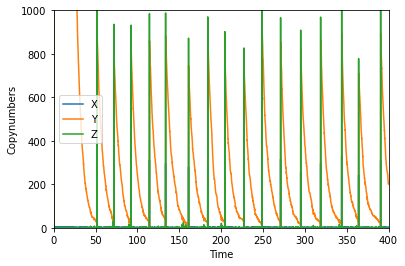

In [627]:
#A_plot, = plt.plot(t,A, label="A")
X_plot, = plt.plot(t,X, label="X")
Y_plot, = plt.plot(t,Y, label="Y")
Z_plot, = plt.plot(t,Z, label="Z")
#P_plot, = plt.plot(t,P, label="P")

plt.legend()
plt.xlabel("Time")
plt.xlim(0,400)
plt.ylim(0,1000)
plt.ylabel("Copynumbers")
plt.show()